In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# EDA GET FAMILIAR

In [3]:
# Load data - CSV uses # as delimiter
df = pd.read_csv(r"E:/aleksa_praksa/nlp_internship/data-internship/data/internship_nlp_dataset.csv", sep="#") 
#df.head() # drop Unnamed: 0 - duplicate column
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_shuffled.head()


,Unnamed: 0,index,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,728769,728769,fr_0118151,product_fr_0061489,reviewer_fr_0213454,4,Eclairage extérieur. Distance de détection un ...,Installation simple et rapide.,fr,home
1,559618,559618,es_0819306,product_es_0368454,reviewer_es_0359713,4,Se ve muy bien es una tablet y el menú se ve e...,Que cumple con lo que ofrecen,es,pc
2,592935,592935,es_0104890,product_es_0043054,reviewer_es_0637035,5,Me llegaron en 2 paquetes de 50 bolas cada uno,De tamaño perfecto,es,toy
3,355402,355402,en_0419616,product_en_0680858,reviewer_en_0635219,4,"Works and fits great, fan on it died after abo...",Four Stars,en,pc
4,94375,94375,de_0467692,product_de_0558330,reviewer_de_0112597,3,Das bi-oil ist okay Mir war es zu ölig dafür d...,Ganz okay,de,beauty


In [651]:
df['language'].unique()

array(['de', 'en', 'es', 'fr', 'zh', 'ja'], dtype=object)

In [652]:
df[df['language'] == 'en'] 

,Unnamed: 0,index,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
172073,200000,200000,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture
172074,200001,200001,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement
172075,200002,200002,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home
172076,200003,200003,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless
172077,200004,200004,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc
...,...,...,...,...,...,...,...,...,...,...
622385,1239995,1239995,en_0447642,product_en_0068982,reviewer_en_0061521,5,This ribbon is so adorable! Goes perfect with ...,So Cute!,en,home
622386,1239996,1239996,en_0950370,product_en_0563046,reviewer_en_0871798,5,I am in love with this kettle.,Perfect,en,kitchen
622387,1239997,1239997,en_0203466,product_en_0848682,reviewer_en_0474236,5,My Doberman Loves Having His Nails Trimmed and...,My Doberman Loves Them,en,pet_products
622388,1239998,1239998,en_0010627,product_en_0536493,reviewer_en_0546192,5,"I love my Fire.. I do everything on it, read, ...",Five Stars,en,other


In [653]:
print("Number of rows", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows 631383
Number of columns:  10


In [654]:
df.columns

Index(['Unnamed: 0', 'index', 'review_id', 'product_id', 'reviewer_id',
       'stars', 'review_body', 'review_title', 'language', 'product_category'],
      dtype='object')

In [655]:
df = df.drop(columns = ['Unnamed: 0', 'index', 'review_id', 'product_id', 'reviewer_id'])

In [656]:
df.select_dtypes(include='object').describe() 

,review_body,review_title,language,product_category
count,631383,631345,631383,631383
unique,628310,404434,6,31
top,Conforme à la description,Three Stars,en,home
freq,105,4120,199177,75808


In [657]:
df.groupby('stars')[df.select_dtypes(include='object').columns].describe()  # check for duplicates

review_body                                         review_title         \
            count  unique                        top freq        count unique   
stars                                                                           
1          126288  125913      Très mauvaise qualité   10       126280  84741   
2          126532  126417      No es lo que esperaba   12       126527  93123   
3          126318  126109      Smaller than expected   14       126306  93789   
4          126251  125487   Bon rapport qualité prix   49       126248  85481   
5          125994  125227  Conforme à la description   46       125984  78708   

                         language                   product_category         \
               top  freq    count unique top   freq            count unique   
stars                                                                         
1         One Star  3403   126288      6  en  39806           126288     31   
2        Two Stars  3662   126532      6  en  39839           126532     31   
3      Three Stars  4098   126318      6  en  39806           126318     31   
4       Four Stars  3910   126251      6  en  39867           126251     31   
5       Five Stars  3868   125994      6  en  39859           125994     31   

                        
            top   freq  
stars                   
1      wireless  16384  
2          home  15334  
3          home  15678  
4          home  14859  
5          home  15089

In [658]:
df[df.duplicated()]

,stars,review_body,review_title,language,product_category
9672,1,Programm läuft nicht,fehlerhaft,de,video_games
16164,1,Mein Account wurde gehackt und dann wurde dami...,Gekaufte Bewertungen,de,wireless
16585,1,Funktioniert nicht. Es sollten Filme von einer...,Ohne Nutzen,de,other
21095,1,Ware bis heute nicht erhalten. Geld auch nicht...,Finger weg,de,wireless
33066,1,2016 konnte von der Wunschliste noch kein Über...,miese Rezension ist für Amazon-Bestellseite,de,digital_ebook_purchase
...,...,...,...,...,...
618016,1,Never received the item.,One Star,en,wireless
624430,4,Para regalar está bien,Para regalar está bien,es,toy
627411,4,Livraison très longue !!,Livraison très longue !!,fr,grocery
628167,5,C’est extra... Commande et livraison tout a ét...,Câble iPhone garantie à vie...,fr,electronics


In [659]:
df.groupby('stars')[df.select_dtypes(include='object').columns].describe() # i could join title and body?

review_body                                         review_title         \
            count  unique                        top freq        count unique   
stars                                                                           
1          126288  125913      Très mauvaise qualité   10       126280  84741   
2          126532  126417      No es lo que esperaba   12       126527  93123   
3          126318  126109      Smaller than expected   14       126306  93789   
4          126251  125487   Bon rapport qualité prix   49       126248  85481   
5          125994  125227  Conforme à la description   46       125984  78708   

                         language                   product_category         \
               top  freq    count unique top   freq            count unique   
stars                                                                         
1         One Star  3403   126288      6  en  39806           126288     31   
2        Two Stars  3662   126532      6  en  39839           126532     31   
3      Three Stars  4098   126318      6  en  39806           126318     31   
4       Four Stars  3910   126251      6  en  39867           126251     31   
5       Five Stars  3868   125994      6  en  39859           125994     31   

                        
            top   freq  
stars                   
1      wireless  16384  
2          home  15334  
3          home  15678  
4          home  14859  
5          home  15089

In [660]:
df.duplicated().sum() # drop them


np.int64(112)

In [661]:
df.info() # review_title has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631383 entries, 0 to 631382
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   stars             631383 non-null  int64 
 1   review_body       631383 non-null  object
 2   review_title      631345 non-null  object
 3   language          631383 non-null  object
 4   product_category  631383 non-null  object
dtypes: int64(1), object(4)
memory usage: 24.1+ MB


In [662]:
print(df.isnull().sum())

stars                0
review_body          0
review_title        38
language             0
product_category     0
dtype: int64


In [663]:
missing_percentage = 100 * (df['review_title'].isnull().sum() / df['review_title'].shape[0])
print(missing_percentage) # drop them or fill with no title or extracting a title from the review body?


0.006018533916814358


In [664]:
df['stars'].value_counts()

stars
2    126532
3    126318
1    126288
4    126251
5    125994
Name: count, dtype: int64

In [665]:
df['product_category'].unique()

array(['sports', 'home_improvement', 'drugstore', 'toy', 'baby_product',
       'lawn_and_garden', 'book', 'home', 'wireless', 'pc', 'electronics',
       'shoes', 'automotive', 'furniture', 'beauty',
       'digital_ebook_purchase', 'kitchen', 'personal_care_appliances',
       'office_product', 'apparel', 'video_games', 'pet_products',
       'digital_video_download', 'musical_instruments', 'other', 'watch',
       'luggage', 'jewelry', 'industrial_supplies', 'grocery', 'camera'],
      dtype=object)

In [666]:
df['product_category'].value_counts()

product_category
home                        75808
wireless                    66086
sports                      33864
toy                         33644
home_improvement            33352
apparel                     32324
beauty                      28374
pc                          27194
drugstore                   26432
other                       24881
electronics                 24003
kitchen                     23557
automotive                  20378
lawn_and_garden             20130
book                        17688
pet_products                17400
furniture                   15382
office_product              15349
baby_product                13069
digital_ebook_purchase      11625
shoes                       11596
grocery                      8818
luggage                      8098
jewelry                      7426
camera                       7267
personal_care_appliances     6888
industrial_supplies          4886
video_games                  4175
watch                        41

In [667]:
df['language'].value_counts() # focus on one language at a time? - separate models per language

language
en    199177
de    180721
fr    138720
es    109746
zh      2531
ja       488
Name: count, dtype: int64

# EDA CLEANING

In [ ]:
# Handle Missing Values

df['review_title'] = df['review_title'].fillna('No Title') # nisi po jezicima uradio greska - stavi prazan string !!!!!


In [669]:
df['review_title'].isnull().sum()

np.int64(0)

In [670]:
df.head()

,stars,review_body,review_title,language,product_category
0,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports
1,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement
2,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore
3,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore
4,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy


In [671]:
df.shape[0]

631383

In [672]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


# EDA INITIAL FEATURE ENGINEERING

In [673]:
df['review_length'] = df['review_body'].str.len()

In [5]:
df['title_length'] = df['review_title'].str.len()

In [675]:
df.head()

,stars,review_body,review_title,language,product_category,review_length,title_length
0,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports,46,25
1,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement,34,24
2,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore,384,15
3,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore,205,17
4,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy,114,22


In [676]:
df.groupby('stars')['review_length'].describe() # length doesnt have strong impact on stars , check reviews with 3000 caracters

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,126273.0,172.228774,152.576045,15.0,76.0,132.0,216.0,3601.0
2,126520.0,198.084050,175.463887,18.0,88.0,149.0,250.0,3211.0
3,126292.0,187.399400,174.415486,15.0,80.0,139.0,234.0,3724.0
4,126221.0,176.173157,174.028399,15.0,68.0,130.0,219.0,3908.0
5,125965.0,154.242623,149.706917,14.0,57.0,117.0,192.0,3086.0


In [677]:
long_reviews = df[df['review_length'] > 1000]
print(long_reviews[long_reviews['language'] == 'en']['review_body'].iloc[0]) 

My best friend got this mattress before summer started and I've slept on it many times and I get the best sleep at her house. I asked for the mattress as a birthday present, I opened it on the 9th and as I was unrolling it i was starting to smell something musty but i thought it could be because it just traveled in a box for a few days. It's now the 12th and my ENTIRE BOTTOM FLOOR WREAKS OF SOME NASTY MUSTY SMELL. It smells like the bed is rotting. OH and the mattress I ordered is classified as a 6inch mattress but its measuring between 4 and 4 1/2 inches... 3 days later. Today is the first day I have done anything other than touch with my fingers or sniff. The bed feels very firm and if you sniff it you will want to gag. I've already filed through amazon that I'd like a replacement. I'm just puzzled how the mattresses could be so different. We both slept on her brand new, 6 inch, Zinus mattress less than 24 hours after she opened it but mine is like I picked it up off the side of the 

In [678]:
df.groupby('stars')['title_length'].describe() # check what is title length 1

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,126273.0,21.911375,15.601674,1.0,11.0,18.0,28.0,128.0
2,126520.0,22.847194,15.814666,1.0,12.0,19.0,30.0,128.0
3,126292.0,22.402147,16.073378,1.0,11.0,18.0,30.0,128.0
4,126221.0,20.861608,15.292303,1.0,10.0,17.0,27.0,128.0
5,125965.0,19.162236,13.895140,1.0,10.0,15.0,25.0,128.0


In [15]:
short_titles = df[df['title_length'] == 1]

# View the result
short_titles[short_titles['language'] == 'en'][['review_title', 'stars', 'review_body']].sample(frac=1, random_state=42).reset_index(drop=True)
 # turn emoji into text!

,review_title,stars,review_body
0,.,1,My item was sent to the wrong house 👎🏼
1,😡,1,After putting the screen protector on I went t...
2,4,4,My grand daughter is 12 and loved the toe sock...
3,.,5,"Will buy again. Great product, fit on the scre..."
4,👍,5,Haven't fully put them on my vehicle but from ...
...,...,...,...
240,😖,3,"Unfortunately, the containers I purchased deve..."
241,🤪,1,Came damaged return in process getting a new o...
242,👌,3,Had to tap out my mount bigger plus bolts a li...
243,🤣,4,"This was really cute, and I say was because my..."


In [680]:
df['punctuation_count'] = df['review_body'].apply(lambda x: x.count('!') + x.count('?'))
df.head() 

,stars,review_body,review_title,language,product_category,review_length,title_length,punctuation_count
0,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports,46,25,0
1,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement,34,24,1
2,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore,384,15,0
3,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore,205,17,0
4,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy,114,22,0


In [681]:
df['punctuation_count'].unique() 

array([  0,   1,   2,   3,   4,   8,   7,   6,   5,  12,   9,  11,  10,
        21,  15,  30,  13,  18,  31,  14,  44,  36,  16,  17,  35,  28,
        37,  19,  25,  23,  62,  32,  20,  22, 134,  97,  24,  53,  26,
       140, 119,  34, 358,  43,  29,  45, 175,  27,  64,  74,  46,  82,
        79,  38, 147, 176,  52,  58,  51,  55])

In [682]:
df.groupby('stars')['punctuation_count'].describe() # not very predictive for star classification, check outliers above 100?

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,126273.0,0.560373,2.129443,0.0,0.0,0.0,0.0,358.0
2,126520.0,0.256054,0.920383,0.0,0.0,0.0,0.0,37.0
3,126292.0,0.199348,0.959857,0.0,0.0,0.0,0.0,175.0
4,126221.0,0.221659,0.923189,0.0,0.0,0.0,0.0,140.0
5,125965.0,0.407296,1.070966,0.0,0.0,0.0,0.0,64.0


In [683]:
# Count words in all caps
df['all_caps_count'] = df['review_body'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))

In [684]:
df.head()

,stars,review_body,review_title,language,product_category,review_length,title_length,punctuation_count,all_caps_count
0,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports,46,25,0,0
1,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement,34,24,1,0
2,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore,384,15,0,0
3,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore,205,17,0,0
4,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy,114,22,0,0


In [685]:
df.groupby('stars')['all_caps_count'].describe() # not important for star
 

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,126273.0,0.688801,2.493798,0.0,0.0,0.0,1.0,120.0
2,126520.0,0.612694,2.130692,0.0,0.0,0.0,0.0,166.0
3,126292.0,0.577701,1.956998,0.0,0.0,0.0,0.0,106.0
4,126221.0,0.542960,1.814902,0.0,0.0,0.0,0.0,91.0
5,125965.0,0.464518,1.654717,0.0,0.0,0.0,0.0,136.0


# EDA VISUALISATION

In [686]:
import seaborn as sns

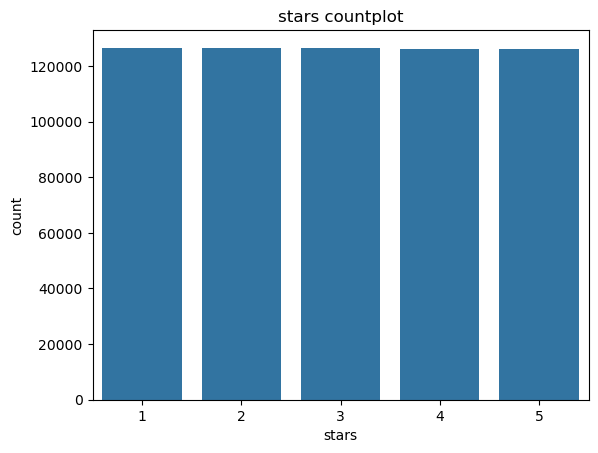

In [687]:
plt.figure()
sns.countplot(data = df, x = 'stars')
plt.title('stars countplot')
plt.show()

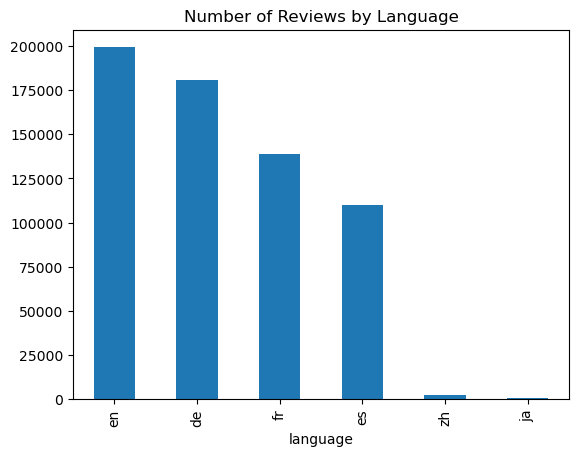

In [688]:
df['language'].value_counts().plot(kind='bar')
plt.title("Number of Reviews by Language")
plt.show()

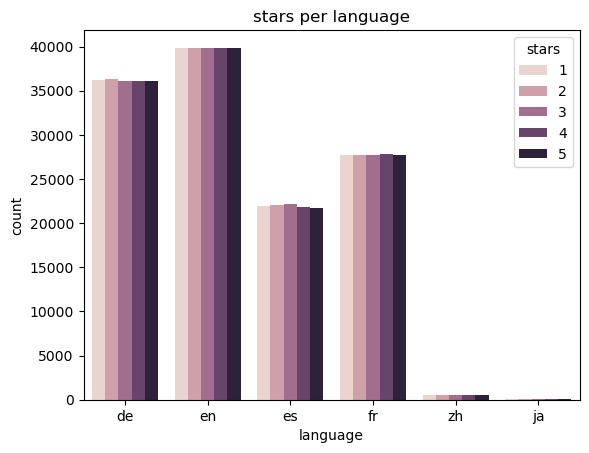

In [689]:
plt.figure()
sns.countplot(data = df, x = 'language', hue='stars') # drop zh and ja samples?
plt.title('stars per language')
plt.show()

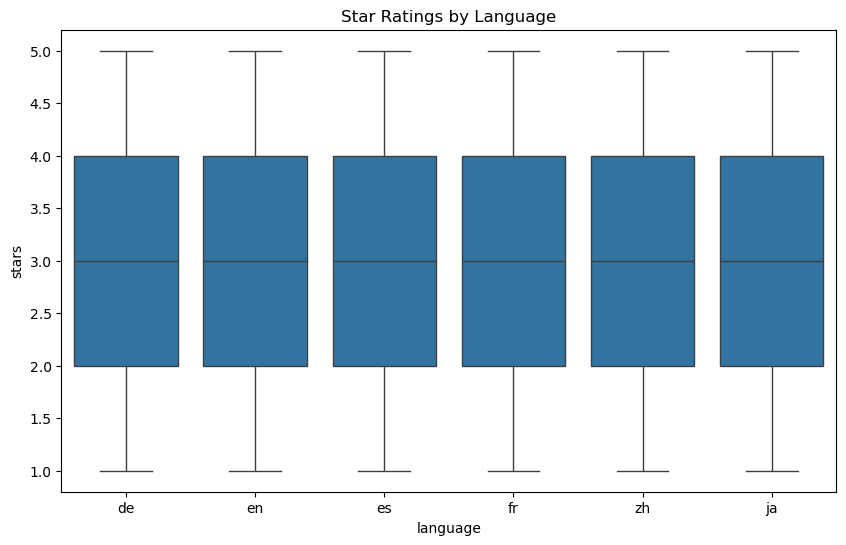

In [690]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='language', y='stars')
plt.title("Star Ratings by Language")
plt.show()

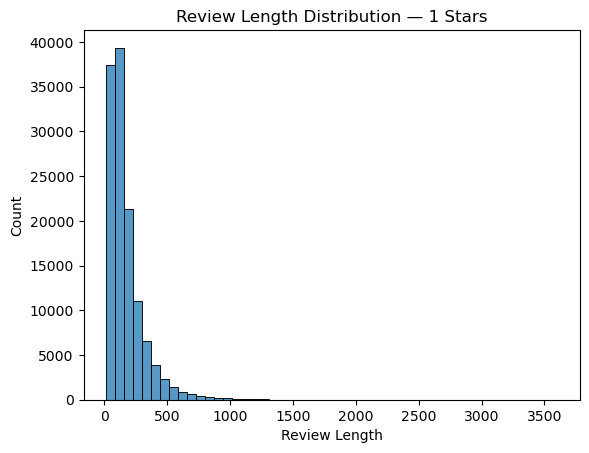

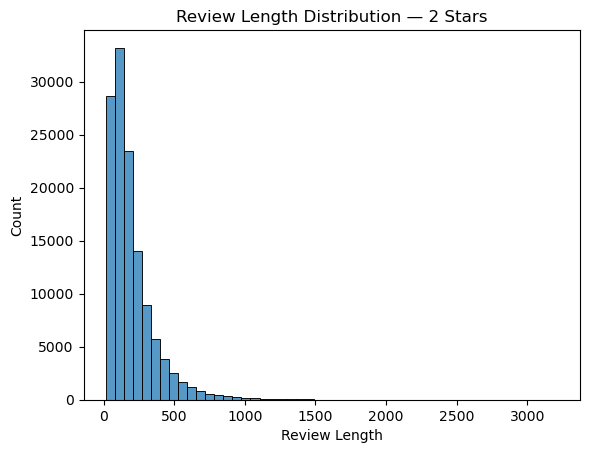

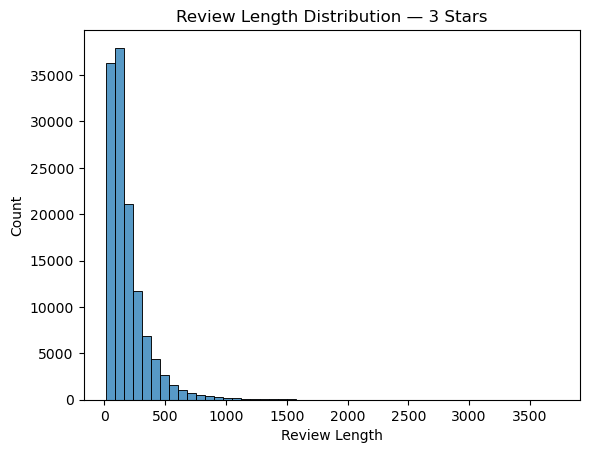

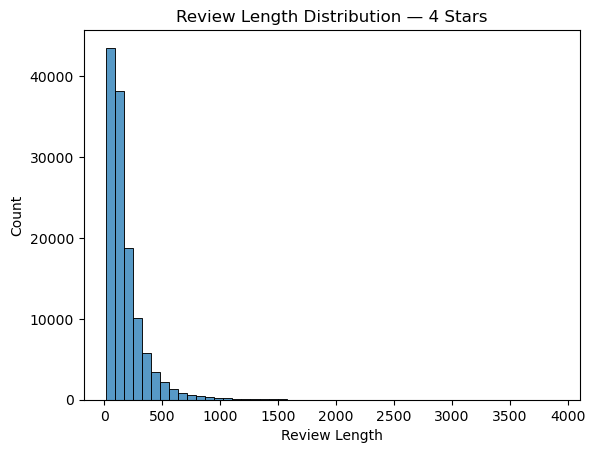

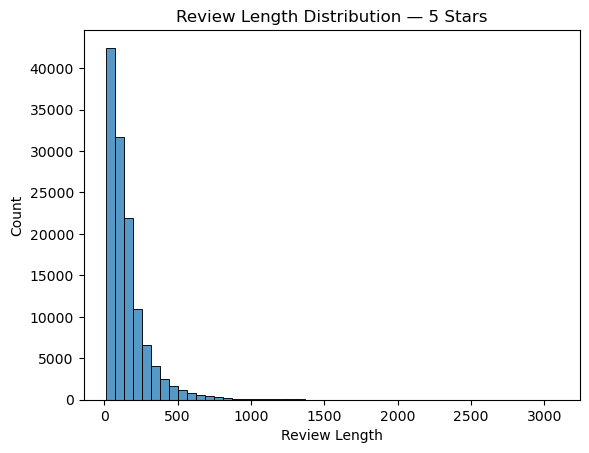

In [691]:
stars = sorted(df['stars'].unique())

for star in stars:
    subset = df[df['stars'] == star]
    sns.histplot(subset['review_length'], bins=50)
    plt.title(f"Review Length Distribution — {star} Stars")
    plt.xlabel("Review Length")
    plt.ylabel("Count")
    plt.show()

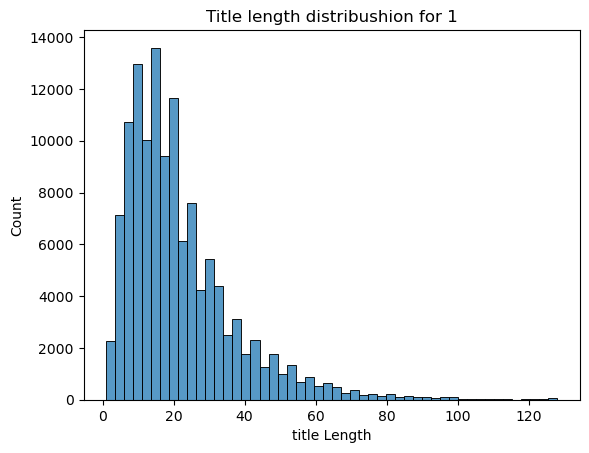

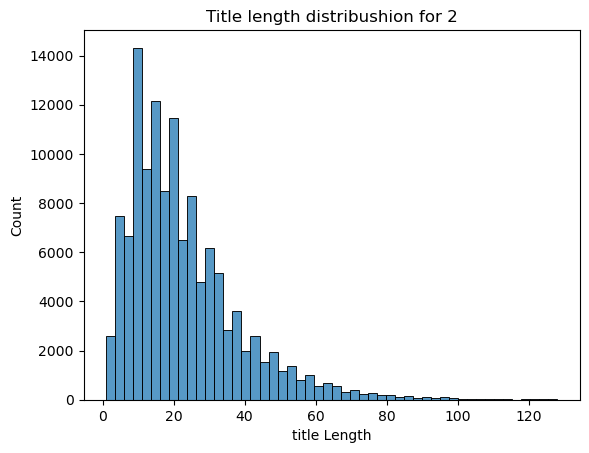

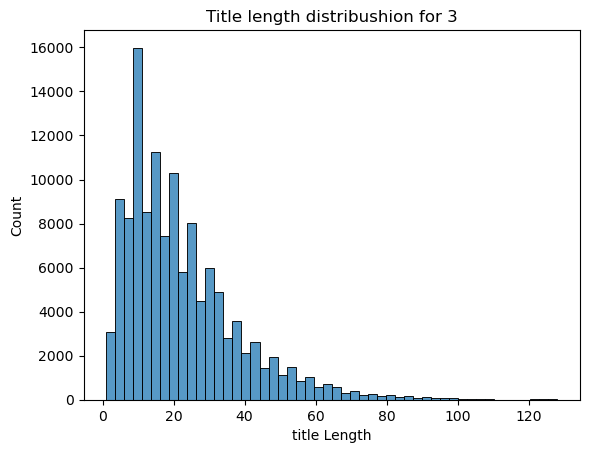

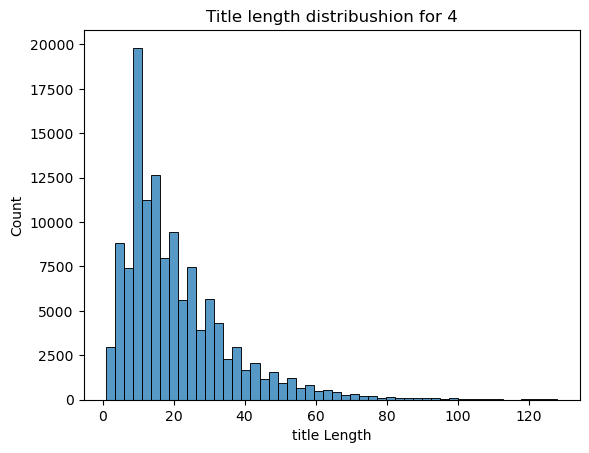

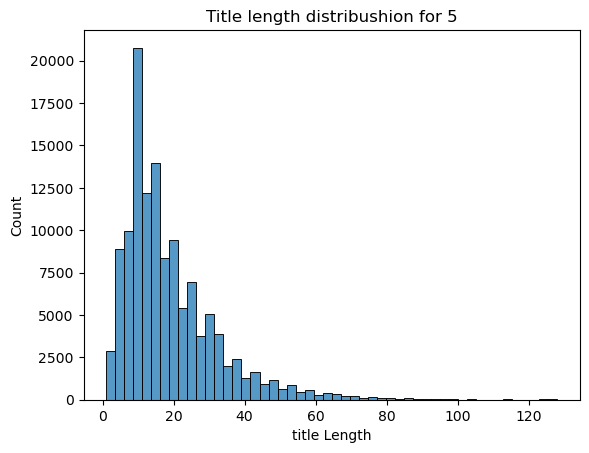

In [692]:
stars = sorted(df['stars'].unique())

for star in stars:
    subset = df[df['stars'] == star]
    sns.histplot(subset['title_length'], bins = 50)
    plt.title(f'Title length distribushion for {star}')
    plt.xlabel("title Length")
    plt.ylabel("Count")
    plt.show()


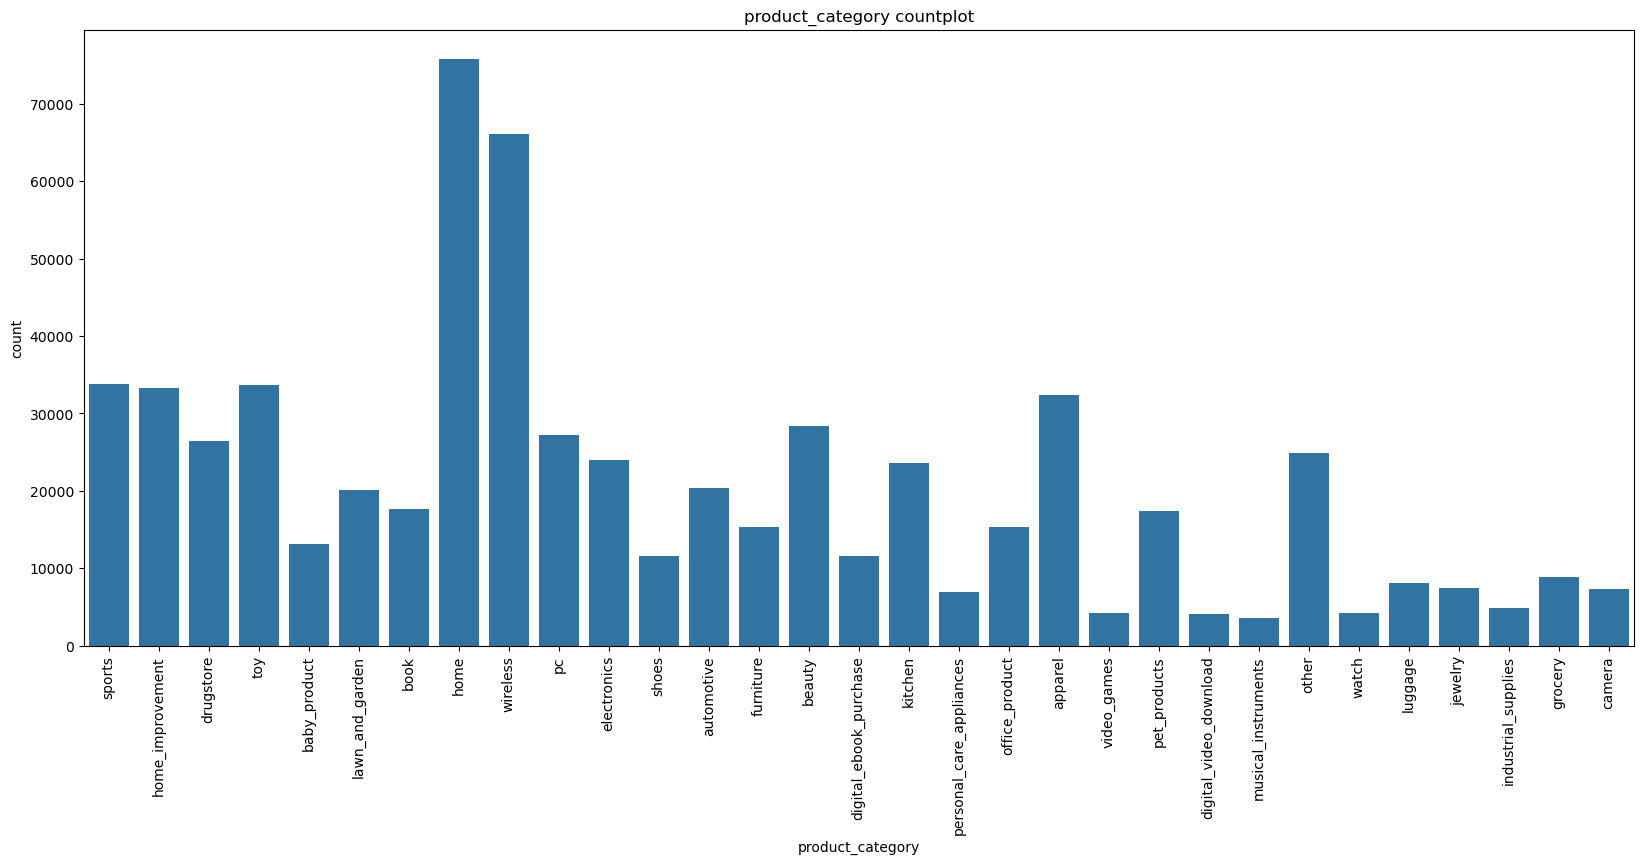

In [693]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'product_category')
plt.xticks(rotation=90)
plt.title('product_category countplot')
plt.show()

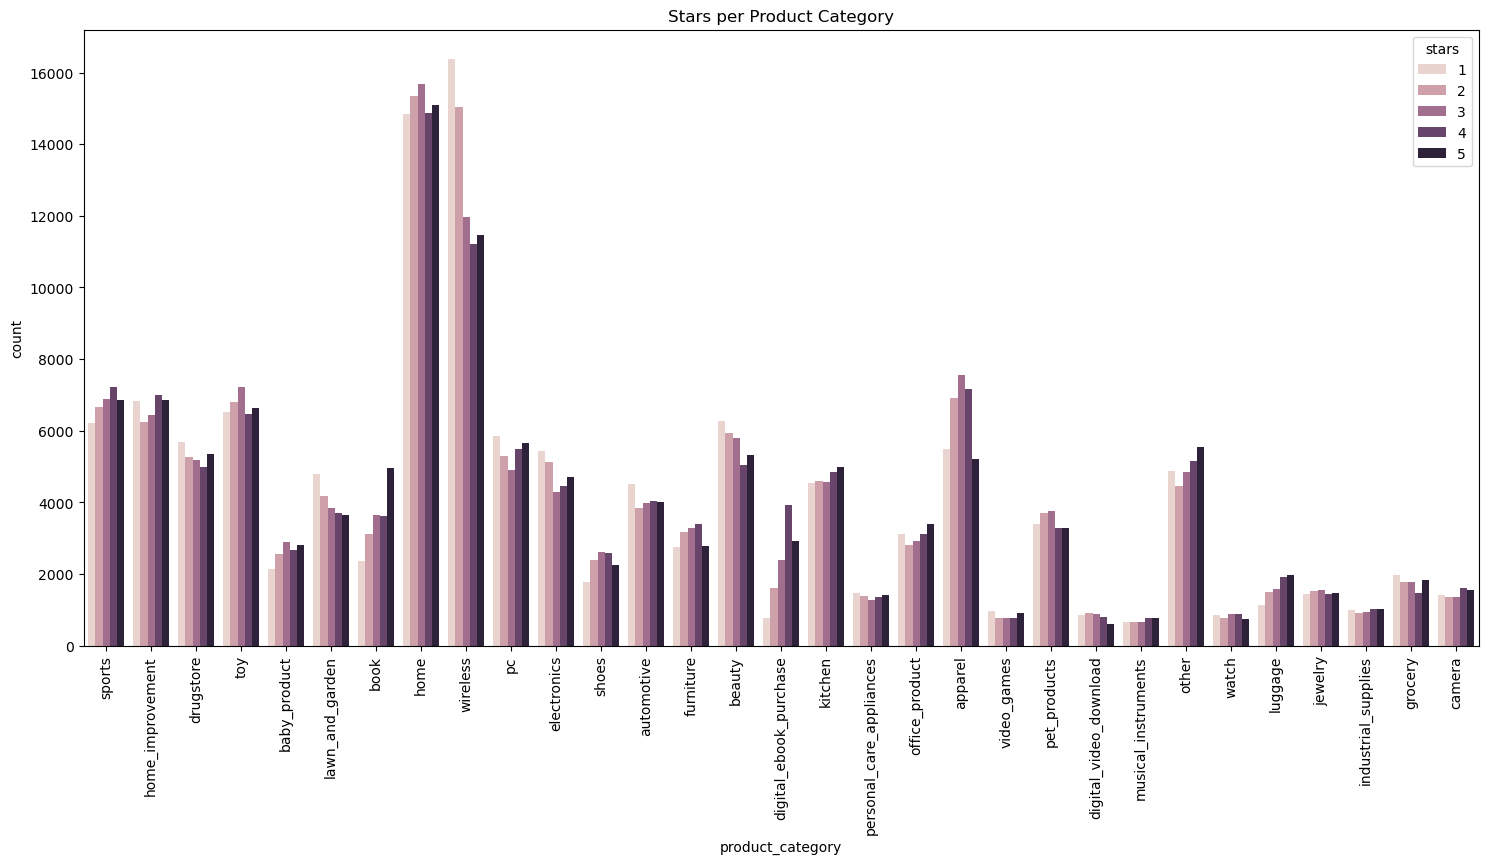

In [694]:
plt.figure(figsize=(18,8))
sns.countplot(data=df, x='product_category', hue='stars') # group rare categories into a single "Other" category?
plt.xticks(rotation=90)
plt.title("Stars per Product Category")
plt.show()

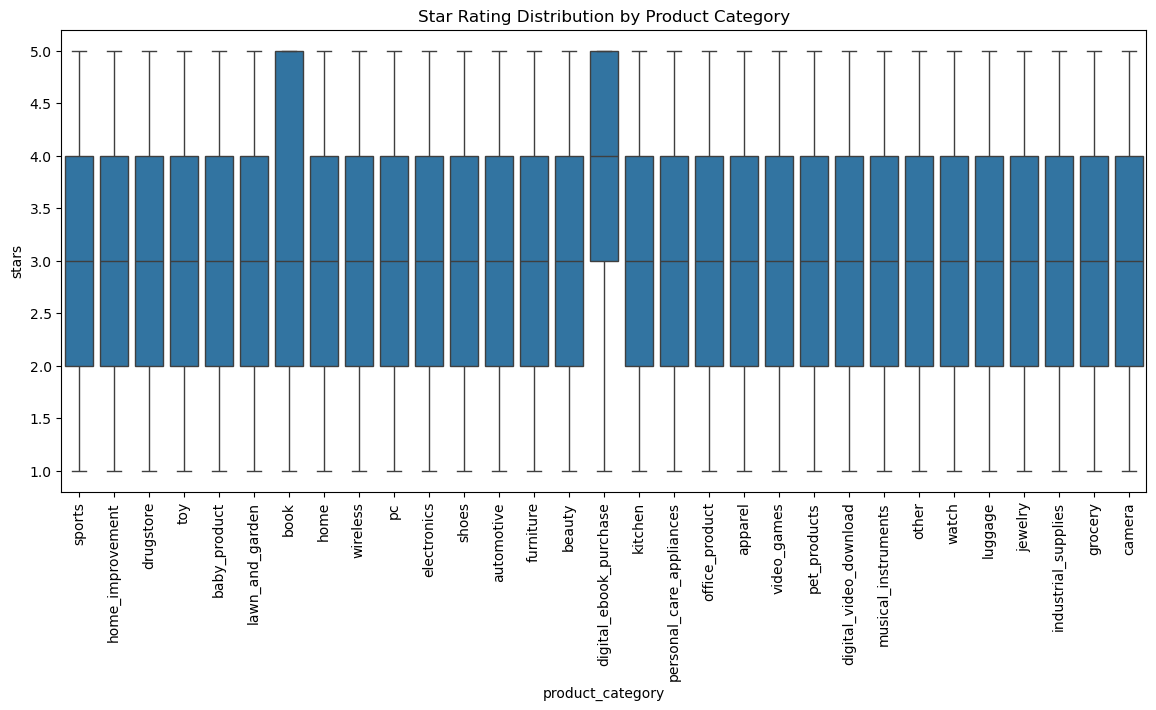

In [695]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='product_category', y='stars') #group all categoris in same except book and ebook for star pred or drop this column?
plt.xticks(rotation=90)
plt.title("Star Rating Distribution by Product Category")
plt.show()

# FINAL PREPROCESSING AND CLEANING

In [696]:
# Combine title and body into a single column

df['text'] = df['review_title'].fillna('') + ' ' + df['review_body']

In [697]:
df.head()

,stars,review_body,review_title,language,product_category,review_length,title_length,punctuation_count,all_caps_count,text
0,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports,46,25,0,0,Leider nach 1 Jahr kaputt Armband ist leider n...
1,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement,34,24,1,0,EINS statt ZWEI Akkus!!! In der Lieferung war ...
2,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore,384,15,0,0,"Achtung Abzocke Ein Stern, weil gar keine geht..."
3,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore,205,17,0,0,"Zu viel des Guten Dachte, das wären einfach et..."
4,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy,114,22,0,0,Qualität sehr schlecht Meine Kinder haben kaum...


In [698]:
df['language'].unique()

array(['de', 'en', 'es', 'fr', 'zh', 'ja'], dtype=object)

In [699]:
print(df.shape[0], '\n')

df = df[(df['language'] != 'zh') & (df['language'] != 'ja')]

print('\n',df.shape[0])


631271 


 628253


In [700]:
# !pip install emoji

In [701]:
import emoji

# df['preprocessed_text'] = df['text'].apply(lambda x: emoji.demojize(x))

In [702]:
# Faster apply with swifter
# df['preprocessed_text'] = df['text'].swifter.apply(lambda x: emoji.demojize(x))

In [703]:
#short_titles = df[df['title_length'] == 1]

# View the result
#short_titles[['review_title', 'stars', 'preprocessed_text']] # turn emoji into text!

In [704]:
df_en = df[df['language'] == 'en']
df_en.head()

,stars,review_body,review_title,language,product_category,review_length,title_length,punctuation_count,all_caps_count,text
172073,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture,612,111,0,4,I'll spend twice the amount of time boxing up ...
172074,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement,56,12,0,0,Not use able the cabinet dot were all detached...
172075,1,I received my first order of this product and ...,The product is junk.,en,home,206,20,0,3,The product is junk. I received my first order...
172076,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless,145,22,1,1,Fucking waste of money This product is a piece...
172077,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc,91,6,0,0,bubble went through 3 in one day doesn't fit c...


In [705]:
def demojize_row(row):
    lang = row['language'] # row is dict

    if lang == 'de':
        return emoji.demojize(row['text'], language='de')
    elif lang == 'fr':
        return emoji.demojize(row['text'], language='fr')
    elif lang == 'es':
        return emoji.demojize(row['text'], language='es')
    else:
        # default English
        return emoji.demojize(row['text'])


In [706]:
df['preprocessed_text'] = df.apply(demojize_row, axis=1) 

In [707]:
short_title = df[df['title_length'] == 1]
short_title[['review_title', 'stars', 'preprocessed_text']]

,review_title,stars,preprocessed_text
48,👎,1,:daumen_runter: Schlechte Verarbeitung und das...
362,👎,1,:daumen_runter: Zu klein für 9ner Kassette.
457,!,1,! Die Lieferung war eine reine Katastrophe
473,T,1,"T Ist zwar ein schönes Kleid, aber viel zu kle..."
792,👎,1,:daumen_runter: Schlechte Verarbeitung
...,...,...,...
626378,g,3,"g correspond à la description, couleur ok, for..."
626609,.,3,. Bien adapté à mon usage. Me convient pour ne...
627221,😍,4,:visage_souriant_avec_yeux_en_forme_de_cœur: L...
627924,.,5,. Mon fils adore les projections d étoiles Plu...


In [708]:
df['product_category_star_pred'] = df['product_category'].apply(lambda x: x if x in ['book', 'digital_ebook_purchase'] else 'other')

In [709]:
df['product_category_star_pred'].unique()

array(['other', 'book', 'digital_ebook_purchase'], dtype=object)

In [710]:
df.head()

,stars,review_body,review_title,language,product_category,review_length,title_length,punctuation_count,all_caps_count,text,preprocessed_text,product_category_star_pred
0,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports,46,25,0,0,Leider nach 1 Jahr kaputt Armband ist leider n...,Leider nach 1 Jahr kaputt Armband ist leider n...,other
1,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement,34,24,1,0,EINS statt ZWEI Akkus!!! In der Lieferung war ...,EINS statt ZWEI Akkus!!! In der Lieferung war ...,other
2,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore,384,15,0,0,"Achtung Abzocke Ein Stern, weil gar keine geht...","Achtung Abzocke Ein Stern, weil gar keine geht...",other
3,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore,205,17,0,0,"Zu viel des Guten Dachte, das wären einfach et...","Zu viel des Guten Dachte, das wären einfach et...",other
4,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy,114,22,0,0,Qualität sehr schlecht Meine Kinder haben kaum...,Qualität sehr schlecht Meine Kinder haben kaum...,other


In [711]:
df_onehot = pd.get_dummies(df['product_category_star_pred'], prefix='category').astype(int)

df = pd.concat([df, df_onehot], axis=1)


In [712]:
df.head()

,stars,review_body,review_title,language,product_category,review_length,title_length,punctuation_count,all_caps_count,text,preprocessed_text,product_category_star_pred,category_book,category_digital_ebook_purchase,category_other
0,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports,46,25,0,0,Leider nach 1 Jahr kaputt Armband ist leider n...,Leider nach 1 Jahr kaputt Armband ist leider n...,other,0,0,1
1,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement,34,24,1,0,EINS statt ZWEI Akkus!!! In der Lieferung war ...,EINS statt ZWEI Akkus!!! In der Lieferung war ...,other,0,0,1
2,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore,384,15,0,0,"Achtung Abzocke Ein Stern, weil gar keine geht...","Achtung Abzocke Ein Stern, weil gar keine geht...",other,0,0,1
3,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore,205,17,0,0,"Zu viel des Guten Dachte, das wären einfach et...","Zu viel des Guten Dachte, das wären einfach et...",other,0,0,1
4,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy,114,22,0,0,Qualität sehr schlecht Meine Kinder haben kaum...,Qualität sehr schlecht Meine Kinder haben kaum...,other,0,0,1


# Text Pre-processing

convert the raw messages (sequence of characters) into vectors (sequences of numbers),

## Cleaning the Text

In [744]:
%pip install -U spacy==3.*

Note: you may need to restart the kernel to use updated packages.


In [746]:
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.8.11                        
Location         c:\Users\aleksa.cosovic\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\spacy
Platform         Windows-10-10.0.26100-SP0     
Python version   3.11.14                       
Pipelines        de_core_news_sm (3.8.0), en_core_web_sm (3.8.0), es_core_news_sm (3.8.0), fr_core_news_sm (3.8.0)



In [715]:
import spacy

In [718]:
import spacy

nlp_en = spacy.load('en_core_web_sm')
nlp_de = spacy.load('de_core_news_sm')
nlp_es = spacy.load('es_core_news_sm')
nlp_fr = spacy.load('fr_core_news_sm')

- Having too many variations (e.g., "Cook", "cook", "cooking") can make the model's vocabulary huge and learning harder.
- Preprocessing (lowercasing, ...) - This simplification improves generalization by making the model less sensitive to minor differences.However, excessive reduction can cause information loss if important distinctions are removed.

In [719]:
nlp_dict = {
    'en': nlp_en,
    'de': nlp_de,
    'es': nlp_es,
    'fr': nlp_fr
}

In [ ]:
def spacy_multi_lang_tokenizer(row): # i dint remove stopwords beacause of star pred and IDf, they  carry sentiment (not as, very), try later based on results to add lemmatization
    language = row['language']
    doc = row['preprocessed_text']  
    nlp = nlp_dict.get(language)  
    
    tokens = []
    for t in nlp(doc):
        if t.is_space:
            continue
       
        if t.is_alpha or t.like_num:
            tokens.append(t.text)
        
        elif t.text in ['!', '?']:
            tokens.append(t.text)
    return tokens

In [722]:
# Apply to dataframe
df['tokens'] = df.apply(spacy_multi_lang_tokenizer, axis=1)

In [723]:
df.head() # dodaj bar track 

,stars,review_body,review_title,language,product_category,review_length,title_length,punctuation_count,all_caps_count,text,preprocessed_text,product_category_star_pred,category_book,category_digital_ebook_purchase,category_other,tokens
0,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports,46,25,0,0,Leider nach 1 Jahr kaputt Armband ist leider n...,Leider nach 1 Jahr kaputt Armband ist leider n...,other,0,0,1,"[Leider, nach, 1, Jahr, kaputt, Armband, ist, ..."
1,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement,34,24,1,0,EINS statt ZWEI Akkus!!! In der Lieferung war ...,EINS statt ZWEI Akkus!!! In der Lieferung war ...,other,0,0,1,"[EINS, statt, ZWEI, Akkus, !, !, !, In, der, L..."
2,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore,384,15,0,0,"Achtung Abzocke Ein Stern, weil gar keine geht...","Achtung Abzocke Ein Stern, weil gar keine geht...",other,0,0,1,"[Achtung, Abzocke, Ein, Stern, weil, gar, kein..."
3,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore,205,17,0,0,"Zu viel des Guten Dachte, das wären einfach et...","Zu viel des Guten Dachte, das wären einfach et...",other,0,0,1,"[Zu, viel, des, Guten, Dachte, das, wären, ein..."
4,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy,114,22,0,0,Qualität sehr schlecht Meine Kinder haben kaum...,Qualität sehr schlecht Meine Kinder haben kaum...,other,0,0,1,"[Qualität, sehr, schlecht, Meine, Kinder, habe..."


In [743]:
df['tokens'].iloc[0]

['Leider',
 'nach',
 '1',
 'Jahr',
 'kaputt',
 'Armband',
 'ist',
 'leider',
 'nach',
 '1',
 'Jahr',
 'kaputt',
 'gegangen']

In [ ]:
# df.to_csv('tokenized_dataset.csv') 